In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import seaborn as sns
import pandas as pd
import numpy as np
!pip install fiona
import fiona
!pip install folium
import folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 86.3 MB/s eta 0:00:00


In [3]:
#data = gpd.read_file('/content/poi_uk.gpkg')

In [4]:
clipped_poi = pd.read_csv('poi_clipped.csv')

In [5]:
clipped_poi.head()

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Lower tier local authorities,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation
0,1928714,08f1942c98b2324603b77a71fe6a0e7f,Dance School Silsden,NaN,NaN,"Silsden Methodist Church, Wesley Place, (Off K...",Silsden,BD20 0BN,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928712,08f1942c98b04109037e84609ad1165d,Playdays,elementary_school,home_service|school,94 Gloucester Avenue,Keighley,BD20 0BY,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1928713,08f1942c98b041060379182fd198bae0,T C M Draincare,water_treatment_equipment_and_services,b2b_cleaning_and_waste_management|environmenta...,94 Gloucester Avenue,Keighley,BD20 0BY,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928721,08f1942c98b24b1c038d977f23d40ce6,Leona Bright Cleaning Services LTD,home_cleaning,professional_services|dry_cleaning,21 Kent Avenue,Keighley,BD20 0BU,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1928715,08f1942c98b3639d039e034403bd3446,Jim Robinson Decorators,home_decor,international_business_and_trade_services|pain...,"Cornwall Avenue, Silsden",Keighley,BD20 0DB,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
clipped_poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16811 entries, 0 to 16810
Data columns (total 28 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   fid                                                                     16811 non-null  int64  
 1   id                                                                      16811 non-null  object 
 2   primary_name                                                            16811 non-null  object 
 3   main_category                                                           14897 non-null  object 
 4   alternate_category                                                      12384 non-null  object 
 5   address                                                                 14892 non-null  object 
 6   locality                                                                13727 

In [7]:
clipped_poi.head()

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Lower tier local authorities,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation
0,1928714,08f1942c98b2324603b77a71fe6a0e7f,Dance School Silsden,NaN,NaN,"Silsden Methodist Church, Wesley Place, (Off K...",Silsden,BD20 0BN,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1928712,08f1942c98b04109037e84609ad1165d,Playdays,elementary_school,home_service|school,94 Gloucester Avenue,Keighley,BD20 0BY,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1928713,08f1942c98b041060379182fd198bae0,T C M Draincare,water_treatment_equipment_and_services,b2b_cleaning_and_waste_management|environmenta...,94 Gloucester Avenue,Keighley,BD20 0BY,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1928721,08f1942c98b24b1c038d977f23d40ce6,Leona Bright Cleaning Services LTD,home_cleaning,professional_services|dry_cleaning,21 Kent Avenue,Keighley,BD20 0BU,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1928715,08f1942c98b3639d039e034403bd3446,Jim Robinson Decorators,home_decor,international_business_and_trade_services|pain...,"Cornwall Avenue, Silsden",Keighley,BD20 0DB,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
geo_poi = gpd.read_file('poi_clipped.csv')

In [9]:
gdf = gpd.GeoDataFrame(geo_poi, geometry=gpd.points_from_xy(geo_poi['long'], geo_poi['lat']), crs='WGS84')

In [10]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

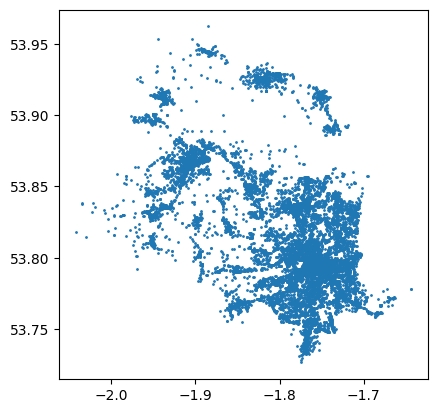

In [11]:
gdf['geometry'].plot(markersize=1)


In [12]:
mask = gdf['locality'] == 'Bradford'
gdf = gdf[mask]

In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 8616 entries, 20 to 16805
Data columns (total 29 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   fid                                                                     8616 non-null   object  
 1   id                                                                      8616 non-null   object  
 2   primary_name                                                            8616 non-null   object  
 3   main_category                                                           8616 non-null   object  
 4   alternate_category                                                      8616 non-null   object  
 5   address                                                                 8616 non-null   object  
 6   locality                                                           

In [14]:
gdf['custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories)'].unique()

array([''], dtype=object)

In [15]:
from sklearn.cluster import DBSCAN


In [16]:
dbscan = DBSCAN(eps=0.15/6371, min_samples=15, metric='haversine')


In [17]:
gdf['lat'] = gdf['lat'].astype(float)
gdf['long'] = gdf['long'].astype(float)
LOC=np.vstack([np.radians(gdf['lat']),np.radians(gdf['long'])]).T

In [18]:
LOC

array([[ 0.9412546 , -0.03397027],
       [ 0.93895189, -0.03321381],
       [ 0.93897329, -0.03317369],
       ...,
       [ 0.93891261, -0.03068812],
       [ 0.93891261, -0.03068812],
       [ 0.93891261, -0.03068812]])

In [19]:
db = DBSCAN(eps=0.1/6371, min_samples=15, algorithm='ball_tree', metric='haversine')
#dbscan.fit(LOC)

In [20]:
db.fit(LOC)

DBSCAN(algorithm='ball_tree', eps=1.5696123057604773e-05, metric='haversine',
       min_samples=15)

In [21]:
db_labels = db.labels_

In [22]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [23]:
db_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [24]:
gdf['dClusters'] = db_labels
gdf.head()

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation,geometry,dClusters
20,1929827,08f1942c9c14c5980365c769dc43b4bd,Pickersgill Manor Farm Bed and Breakfast Yorks...,farm,hotel|bed_and_breakfast,"Pickersgill Manor Farm, Low Lane",Bradford,BD20 9JH,,GB,...,,,,,,,,,POINT (-1.94635 53.92992),-1
30,1929839,08f194252862abae03d67af629d40321,Gee Offshore,truck_dealer_for_businesses,truck_repair_and_services_for_businesses|freig...,"Long Causeway, Denholme",Bradford,BD13 4DX,,GB,...,,,,,,,,,POINT (-1.90301 53.79798),-1
31,1929840,08f19425287422b6035e43880aeb3f5e,Bradford Mobile Disco's,,,"7 Mount Pleasant, Denholme",Bradford,BD13 4DP,,GB,...,,,,,,,,,POINT (-1.90071 53.79921),-1
32,1929849,08f1942528742d62032e9859216898d6,Hoyles Denholme,car_dealer,automotive_dealer|fashion_accessories_store,7 New Road,Bradford,BD13 4DN,ENG,GB,...,,,,,,,,,POINT (-1.90053 53.79954),-1
36,1892374,08f194257098c1050382103c5302fb7b,REJ Pipes Chimney Sweep Services,chimney_sweep,altering_and_remodeling_contractor|chimney_ser...,"1 Thorn Drive, Queensbury",Bradford,BD13 2NX,,GB,...,,,,,,,,,POINT (-1.85745 53.7589),-1


<Axes: >

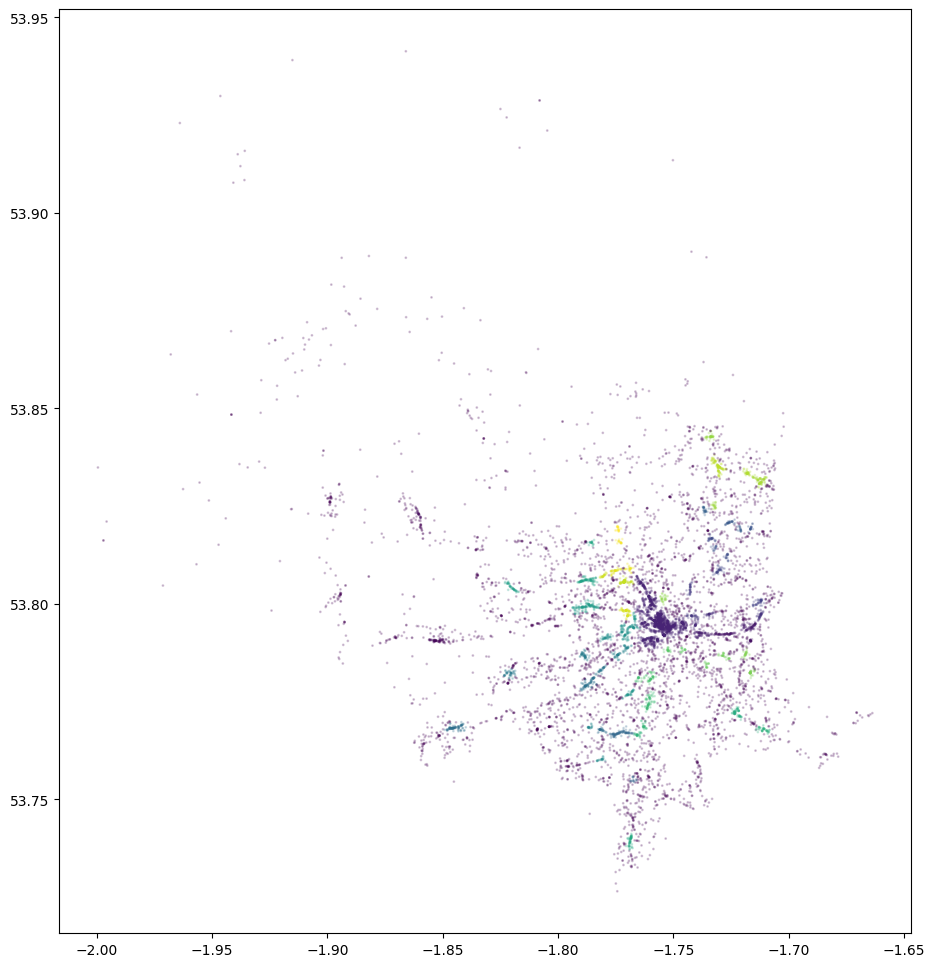

In [25]:
fig,ax = plt.subplots(1, figsize=(12,12))
gdf.plot(column='dClusters',markersize=1, alpha=0.2, ax=ax )
#rename category -1 as not highstreet  cluster

In [26]:
gdf['dClusters'].value_counts()

,count
dClusters,
-1,4276
6,1606
37,117
34,106
61,94
...,...
21,16
67,16
16,15


In [27]:
mask = gdf['dClusters'] != -1
gdf = gdf[mask]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.9 MB/s eta 0:00:00


<Axes: >

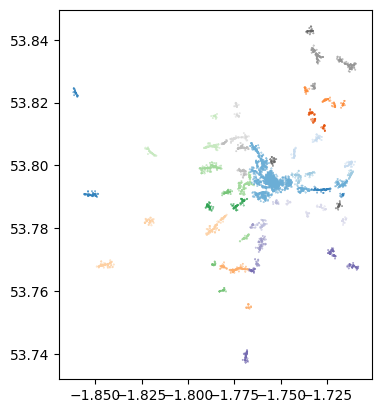

In [28]:
!pip install contextily
import contextily as cx
gdf.plot(column = 'dClusters', markersize=0.1, cmap='tab20c')

In [29]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
!pip install colorcet


In [31]:
import colorcet

<ipython-input-32-92ae10eb5b31>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  get_cmap("cet_glasbey")


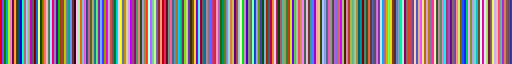

In [32]:
from matplotlib.cm import get_cmap

get_cmap("cet_glasbey")

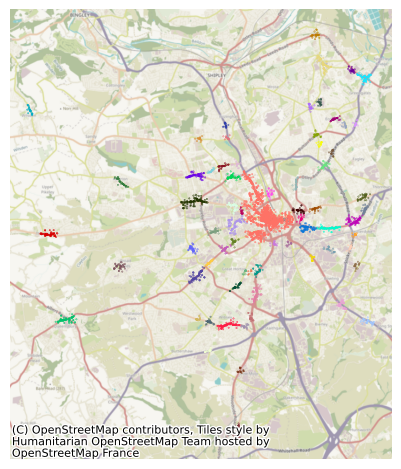

In [33]:
fig, ax = plt.subplots(1)
gdf.plot(column = 'dClusters', markersize=0.1, cmap=colorcet.cm.glasbey, ax=ax)
cx.add_basemap(ax=ax, crs='epsg:4326')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [34]:
# done a poor job of separating the city centre highstreets, rerun the algorithm on just BD1 subset with a smaller distance
# to separate out the highstreets in the city centre
db2 = DBSCAN(eps=0.075/6371, min_samples=15, algorithm='ball_tree', metric='haversine')

In [35]:
bd1_df = gdf[gdf["postcode"].str.contains("BD1 ")]

In [36]:
bd1_df['lat'] = bd1_df['lat'].astype(float)
bd1_df['long'] = bd1_df['long'].astype(float)
LOC2=np.vstack([np.radians(bd1_df['lat']),np.radians(bd1_df['long'])]).T

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [37]:
db2.fit(LOC2)
db2labels = db2.labels_

In [38]:
db2labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  1,  1,  1,  0, -1,  0,  0, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2, -1, -1,  2,  2, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
        2,  2, -1,  2,  2,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [39]:
bd1_df['dClusters'] = db2labels

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [40]:
mask = bd1_df['dClusters'] != -1
bd1_df = bd1_df[mask]

In [41]:
bd1_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

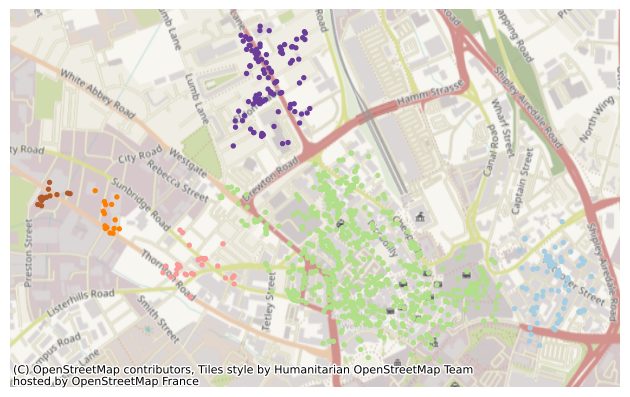

In [42]:
fig, ax = plt.subplots(1)
bd1_df.plot(column = 'dClusters', markersize=8, cmap='Paired', ax=ax)
cx.add_basemap(ax=ax, crs = 'epsg:4326')
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [43]:
gdf.to_csv('bfdhighstreets.csv')

In [44]:
# filter down to just bd3 postcodes for the highstreet of interest

In [45]:
bd3_df = gdf[gdf["postcode"].str.contains("BD3")]


In [46]:
bd3_df

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation,geometry,dClusters
453,1940232,08f1942ccea84ae0033b01bfe1f864d7,Creme de la Creme,ice_cream_shop,restaurant|cafe,816 Leeds Road,Bradford,BD3 9,ENG,GB,...,,,,,,,,,POINT (-1.72931 53.79218),3
454,1940231,08f1942ccea84a4003f11f4713dce2a8,Callmate Telecom,telecommunications_company,professional_services|mobile_phone_store,822 Leeds Road,Bradford,BD3 9,ENG,GB,...,,,,,,,,,POINT (-1.72922 53.79213),3
456,1940237,08f1942cceaa3b80034e3d848d39ac47,Elduns Electrical,,,826 Leeds Road,Bradford,BD3 9TY,,GB,...,,,,,,,,,POINT (-1.72866 53.79226),3
457,1940236,08f1942cceaa3b80030d2ecac0664472,Western Union,,,826 Leeds Road,Bradford,BD3 9TY,,GB,...,,,,,,,,,POINT (-1.72866 53.79226),3
458,1940234,08f1942cceaaed360358cb5819871f64,Travel Care,travel_company,,826 Leeds Road,Bradford,BD3 9TY,ENG,GB,...,,,,,,,,,POINT (-1.72848 53.79214),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15408,1941450,08f1942ccc541896031283e441c5ce0c,Mahad Food Store,shopping,convenience_store|restaurant,1382 Leeds Road,Bradford,BD3 7AE,ENG,GB,...,,,,,,,,,POINT (-1.71143 53.79772),9
15409,1941457,08f1942ccc545ac203c021994996db43,Zee Tyres,tire_dealer_and_repair,automotive_repair|automotive,1394 Leeds Road,Bradford,BD3 7AE,ENG,GB,...,,,,,,,,,POINT (-1.71109 53.79791),9
15410,1941458,08f1942ccc56e24c036cc2c716224eaf,Asgard,outdoor_gear,retail,1392 Leeds Road,Bradford,BD3 7AE,West Yorkshire,GB,...,,,,,,,,,POINT (-1.71107 53.79813),9
15411,1941521,08f1942ccccdca3103b91a4af85ad43a,Thornbury Methodist Church,church_cathedral,social_service_organizations,110 Leeds Old Road,Bradford,BD3 8JS,ENG,GB,...,,,,,,,,,POINT (-1.71075 53.8002),12


<Axes: >

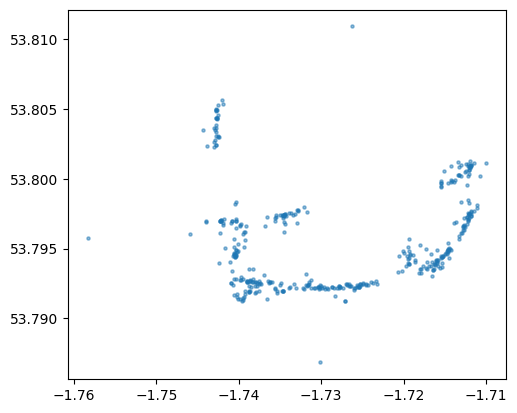

In [47]:
bd3_df.plot(markersize=5, alpha =0.5)

<Axes: >

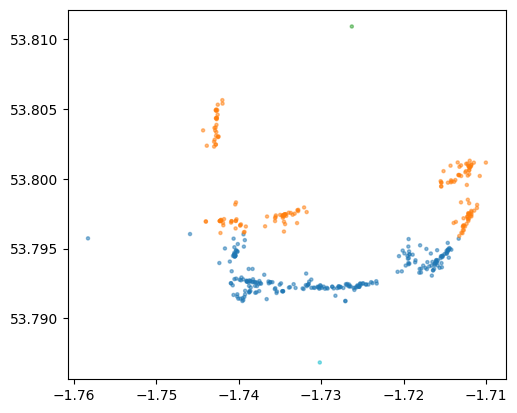

In [48]:
bd3_df.plot(column = 'dClusters', markersize=5, cmap='tab10', alpha=0.5)

In [49]:
bd3_df['dClusters'].value_counts()

,count
dClusters,
4,73
5,71
3,68
12,42
9,36
8,31
11,30
10,28
7,24


In [50]:
cluster3 = bd3_df[bd3_df['dClusters']== 3]

In [51]:
cluster4=bd3_df[bd3_df['dClusters']== 4]

<Axes: >

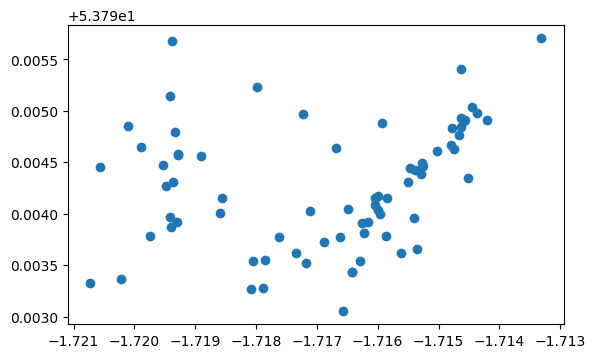

In [52]:
cluster4.plot()

<Axes: >

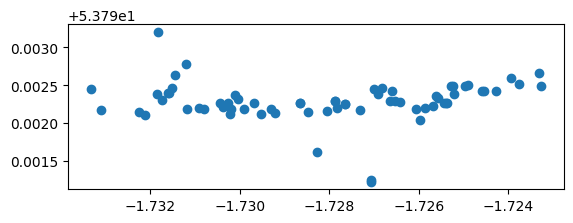

In [53]:
cluster3.plot()

In [54]:
cluster3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

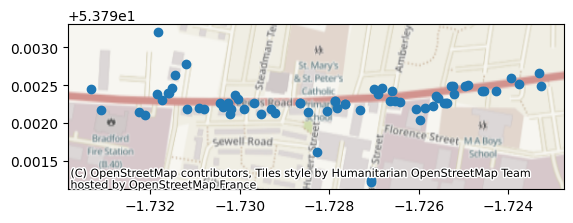

In [55]:

fig, ax = plt.subplots(1)
cluster3.plot(ax=ax)
cx.add_basemap(ax=ax, crs=4326)

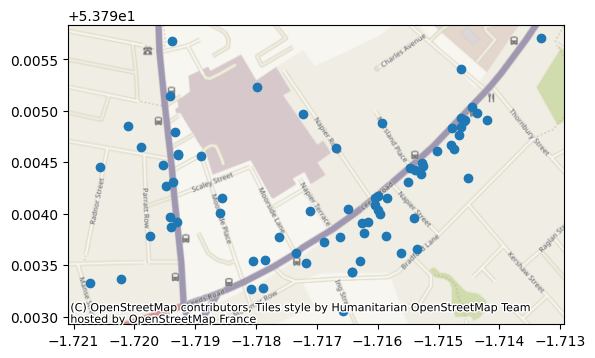

In [56]:

fig, ax = plt.subplots(1)
cluster4.plot(ax=ax)
cx.add_basemap(ax=ax, crs=4326)

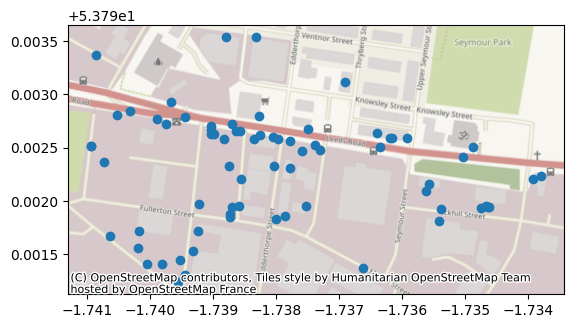

In [57]:
cluster5=bd3_df[bd3_df['dClusters']== 5]
fig, ax = plt.subplots(1)
cluster5.plot(ax=ax)
cx.add_basemap(ax=ax, crs=4326)

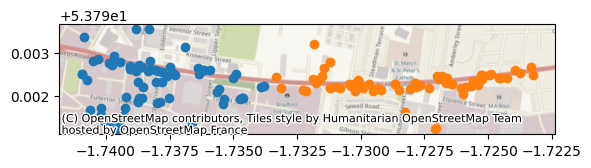

In [58]:
cluster12=bd3_df[bd3_df['dClusters']== 12]
fig, ax = plt.subplots(1)
cluster5.plot(ax=ax)
cluster3.plot(ax=ax)
#cluster4.plot(ax=ax)
cx.add_basemap(ax=ax, crs=4326)

In [59]:
leeds_rd_df = pd.concat([cluster3, cluster5])

In [60]:
leeds_rd_df.head()

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation,geometry,dClusters
453,1940232,08f1942ccea84ae0033b01bfe1f864d7,Creme de la Creme,ice_cream_shop,restaurant|cafe,816 Leeds Road,Bradford,BD3 9,ENG,GB,...,,,,,,,,,POINT (-1.72931 53.79218),3
454,1940231,08f1942ccea84a4003f11f4713dce2a8,Callmate Telecom,telecommunications_company,professional_services|mobile_phone_store,822 Leeds Road,Bradford,BD3 9,ENG,GB,...,,,,,,,,,POINT (-1.72922 53.79213),3
456,1940237,08f1942cceaa3b80034e3d848d39ac47,Elduns Electrical,,,826 Leeds Road,Bradford,BD3 9TY,,GB,...,,,,,,,,,POINT (-1.72866 53.79226),3
457,1940236,08f1942cceaa3b80030d2ecac0664472,Western Union,,,826 Leeds Road,Bradford,BD3 9TY,,GB,...,,,,,,,,,POINT (-1.72866 53.79226),3
458,1940234,08f1942cceaaed360358cb5819871f64,Travel Care,travel_company,,826 Leeds Road,Bradford,BD3 9TY,ENG,GB,...,,,,,,,,,POINT (-1.72848 53.79214),3


In [61]:
leeds_rd_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 139 entries, 453 to 1599
Data columns (total 30 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   fid                                                                     139 non-null    object  
 1   id                                                                      139 non-null    object  
 2   primary_name                                                            139 non-null    object  
 3   main_category                                                           139 non-null    object  
 4   alternate_category                                                      139 non-null    object  
 5   address                                                                 139 non-null    object  
 6   locality                                                            

In [62]:
avg_lat = sum(leeds_rd_df['lat']) / len(leeds_rd_df['lat'])
avg_lon = sum(leeds_rd_df['long']) / len(leeds_rd_df['long'])

# Create a base map centered around the average coordinates with specified width and height
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=16, tiles='Esri.WorldImagery', attr='Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community', width='100%', height='100%')



In [63]:
coord_list = [(x,y) for x,y in zip(leeds_rd_df['geometry'].y , leeds_rd_df['geometry'].x)]
coord_list


[(53.7921821, -1.7293084),
 (53.792131, -1.72922),
 (53.7922632, -1.7286562),
 (53.7922632, -1.7286562),
 (53.79214, -1.72848),
 (53.7916172, -1.7282698),
 (53.7921613, -1.7280562),
 (53.7922882, -1.7278716),
 (53.7922882, -1.7278716),
 (53.792196, -1.72783),
 (53.7922445, -1.7276612),
 (53.7922508, -1.7276556),
 (53.7921724, -1.7273085),
 (53.7912236, -1.7270668),
 (53.79125, -1.72706),
 (53.7922623, -1.7253795),
 (53.7924871, -1.7252758),
 (53.7924828, -1.7252431),
 (53.7923871, -1.7252227),
 (53.7924884, -1.7249654),
 (53.7925077, -1.7249015),
 (53.7921423, -1.7322531),
 (53.7921, -1.732132),
 (53.792379, -1.731862),
 (53.7932063, -1.7318211),
 (53.7923056, -1.7317421),
 (53.7924, -1.73161),
 (53.7923965, -1.7315846),
 (53.7924647, -1.7315124),
 (53.7926331, -1.7314555),
 (53.7927764, -1.7311976),
 (53.7921843, -1.7311876),
 (53.7921999, -1.7309171),
 (53.7921788, -1.7307933),
 (53.7922645, -1.7304416),
 (53.7922156, -1.7303835),
 (53.7922634, -1.7302648),
 (53.792117, -1.7302273),


In [64]:

from IPython.display import display
# Add smaller markers with text labels for each sampling site
for point in coord_list:

    folium.Marker(
        location=point,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    ).add_to(m)

    #folium.map.Marker(
        #location=point,  # Adjust the position for the text
        #icon=folium.DivIcon(
            #html=f'<div style="font-size: 16px; color: blue; font-weight: bold;">{point}</div>'
        #)
    #).add_to(m)
# Display the map
display(m)

In [65]:
m.save("leedsrd.html")


In [66]:
leeds_rd_df = bd3_df[bd3_df["address"].str.contains("Leeds Road")]

<Axes: >

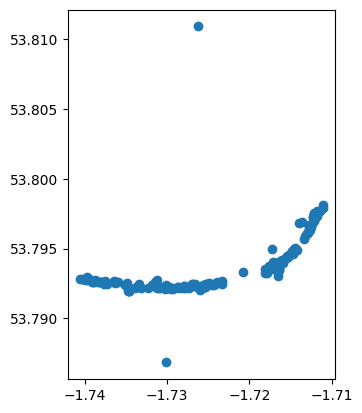

In [67]:
leeds_rd_df.plot()

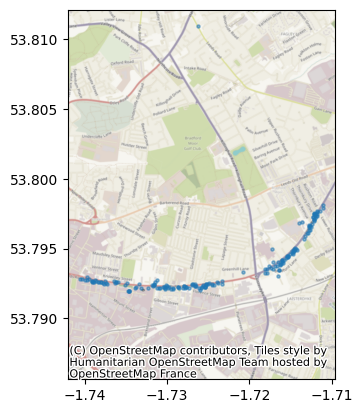

In [68]:
fig, ax = plt.subplots(1)
leeds_rd_df.plot(ax=ax, markersize=5, alpha=0.5)
cx.add_basemap(ax=ax, crs=4326)

In [69]:
leeds_rd_df['main_category'].unique()

array(['ice_cream_shop', 'telecommunications_company', '',
       'travel_company', 'travel_services', 'general_litigation',
       'home_health_care', 'fashion_accessories_store', 'contractor',
       'home_improvement_store', 'automotive_repair', 'halal_restaurant',
       'jewelry_store', 'mobile_phone_store', 'bridal_shop', 'barber',
       'candy_store', 'convenience_store', 'burger_restaurant',
       'shopping', 'restaurant', 'turkish_restaurant', 'wholesale_store',
       'coffee_shop', 'indian_restaurant', 'fast_food_restaurant',
       'printing_services', 'tobacco_shop', 'mosque',
       'fish_and_chips_restaurant', 'dentist', 'desserts', 'library',
       'steakhouse', 'beauty_salon', 'comedy_club', 'hindu_temple',
       'b2b_textiles', 'grocery_store', 'thrift_store', 'fire_department',
       'afghan_restaurant', 'pub', 'lounge', 'fashion', 'clothing_store',
       'diner', 'real_estate_agent', 'flowers_and_gifts_shop',
       'cupcake_shop', 'discount_store', 'boutique'

In [70]:
halal = pd.read_csv('Halal_Food_Locations.csv')

In [71]:
halal.head()

,name,description,longitude,latitude,geometry
0,Brioche Burger Walthamstow,https://halalfoodgastronomy.com/reviews/london...,-0.020725,51.586805,POINT (-0.0207245999999941 51.5868052)
1,The Food Box,"Delicious HMC Certified Burgers, Grills, Wraps...",-2.200410,53.432160,POINT (-2.20041000000003 53.43216)
2,Saffron Kitchen,https://halalfoodgastronomy.com/reviews/london...,-0.028485,51.568982,POINT (-0.0284847000000354 51.5689823)
3,IceBurg,Read our Full Review: https://halalfoodgastron...,-2.697982,53.758760,POINT (-2.69798200000002 53.75876)
4,Howdy,"HMC Certified Burgers, Lamb Chops <br>https://...",-1.731869,53.792360,POINT (-1.73186850000002 53.79236)


In [74]:
import folium

map_center = [53.7833, -1.7833]
m3 = folium.Map(location=map_center, zoom_start=14)

halal_filt = halal[(halal["latitude"] > 53.77) & (halal["latitude"] < 53.80) &
                    (halal["longitude"] > -1.80) & (halal["longitude"] < -1.76)]

coord_list = halal_filt[['latitude', 'longitude']].dropna().values.tolist()

for index, row in halal_filt.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        icon=folium.Icon(color='blue', icon='tint', prefix='fa'),
        popup=row["name"],
        tooltip=row["name"]
    ).add_to(m3)

m3

In [ ]:
religion_services = pd.read_csv('filter_religion_services_GHR.csv')

In [80]:
religion_services.head()

,fid,id,primary_name,main_category,alternate_category,address,locality,postcode,region,country,...,custom-filtered-2025-03-05T10-20-04Z_Lower tier local authorities,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Disability (3 categories),custom-filtered-2025-03-05T10-20-04Z_Age (6 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Age (6 categories),custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Ethnic group (20 categories),custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories) Code,custom-filtered-2025-03-05T10-20-04Z_Religion (10 categories),custom-filtered-2025-03-05T10-20-04Z_Observation
0,1895416,08f1942cd9cc06cc0358af550fcd0821,Madinat Al-Zahra Bradford,non_governmental_association,community_services_non_profits|religious_organ...,"Madinat al Zahra, Bartle Lane, Great Horton Road",Bradford,BD7 4QF,NaN,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1895558,08f1942cdd6c83360321692d2ad8582e,Chapel Of Grace,church_cathedral,religious_organization,355 Great Horton Road,Bradford,BD7 3BZ,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1895242,08f1942cd94ad54503c486f5deb71302,Horton Bank Methodist Church,church_cathedral,social_service_organizations,893 Great Horton Road,Bradford,BD7 4AQ,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1895243,08f1942cd94ad54503c1fb20803f268a,Grace Church Global,church_cathedral,baptist_church,893 Great Horton Road,Bradford,BD7 4AQ,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1895263,08f1942cd9405a59030ca328135e91ce,Masjid-at-Taqwa,mosque,social_service_organizations,807 Great Horton Road,Bradford,BD7 4AG,ENG,GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
map_center = [53.7833, -1.7833]
m4 = folium.Map(location=map_center, zoom_start=14)

rel_filt = religion_services[(religion_services["lat"] > 53.77) & (religion_services["lat"] < 53.80) &
                    (religion_services["long"] > -1.80) & (religion_services["long"] < -1.76)]

coord_list = rel_filt[['lat', 'long']].dropna().values.tolist()

for index, row in rel_filt.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        icon=folium.Icon(color='blue', icon='tint', prefix='fa'),
        popup=row["main_category"],
        tooltip=row["main_category"]
    ).add_to(m4)

m4